#Dhermendra Kumar Tiwari
#Task-14
#GO_STP_3831

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv("User_Data.csv")
df.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [45]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [46]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
df.shape

(400, 5)

In [49]:
df.tail(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
385,15775335,Male,56,60000,1
386,15724150,Female,49,39000,1
387,15627220,Male,39,71000,0
388,15672330,Male,47,34000,1
389,15668521,Female,48,35000,1
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0


In [50]:
df.ndim

2

In [51]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [53]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [54]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [56]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [57]:
df.groupby('Purchased').mean(15)

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


In [58]:
df.groupby('Purchased').var()

,User ID,Age,EstimatedSalary
Purchased,,,
0,5.196529e+09,63.773711,5.929990e+08
1,5.059266e+09,74.169507,1.769397e+09


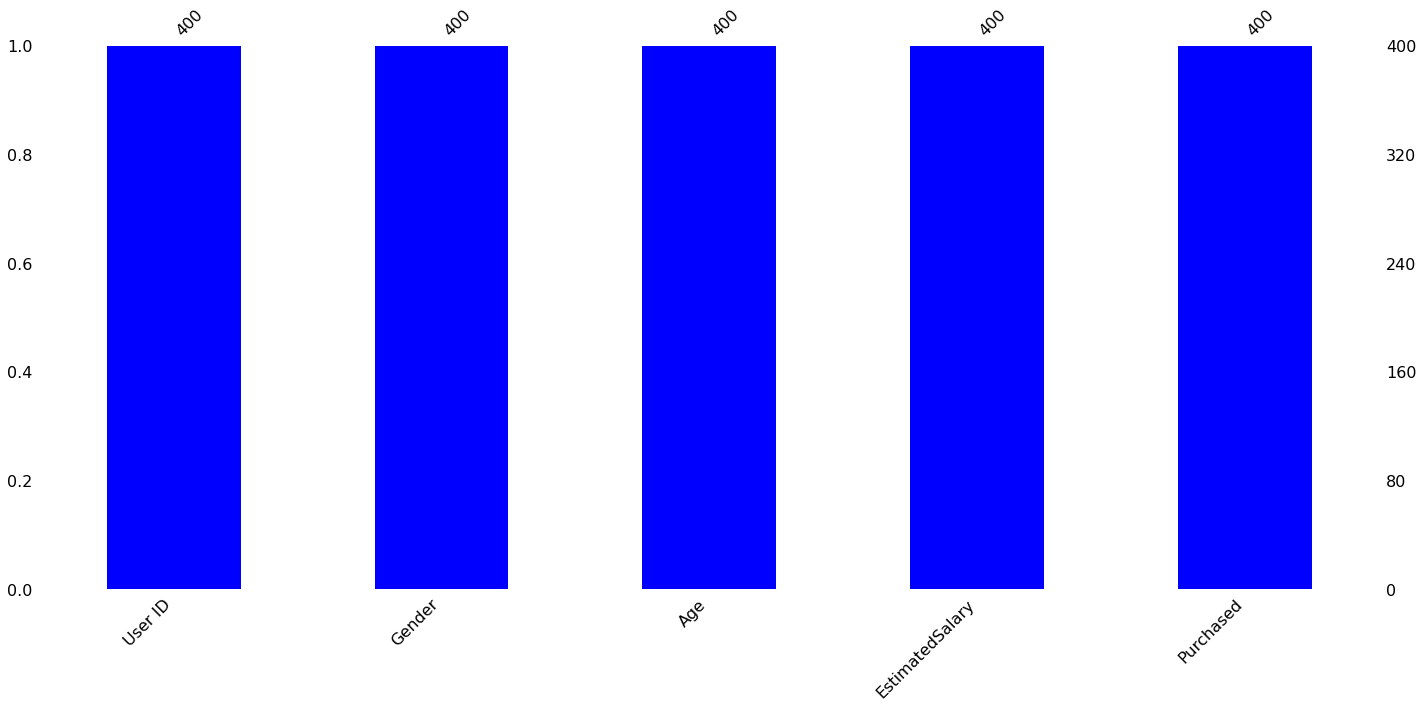

In [59]:
import missingno as msno
msno.bar(df,color='blue')
plt.show()

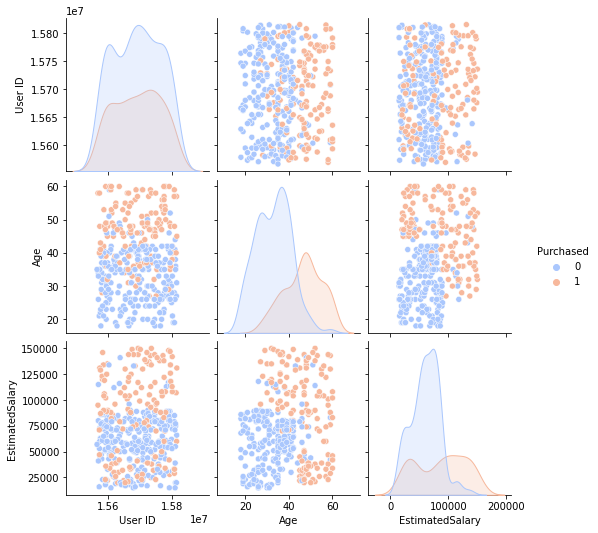

In [60]:
sns.pairplot(df,hue='Purchased',palette='coolwarm')

In [64]:
pip install --upgrade pingouin

     |████████████████████████████████| 215kB 4.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-cp37-none-any.whl size=204754 sha256=55aa94d2a5b05208c60bceb8447e896d230a49d718bb21b69301b52bb4c827a4
  Stored in directory: /root/.cache/pip/wheels/d6/36/7e/ae23fc9845091efd9228b36f93b306a67c40bdc2195b280748
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7050 sha256=8986221955311c4be8fbc88ae6d91ffcab019ece9dea91ccffcf4cc4814fd8cf
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [65]:
import scikitplot as skplt
import pingouin as pg

In [68]:
def plot_num(a):
  fig,axes=plt.subplots(3,2,figsize=(10,12))
  sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0])
  pg.qqplot(df[a],dist='norm',ax=axes[0][1])
  sns.barplot(x=df.Purchased,y=df[a],ax=axes[1][0])
  sns.stripplot(x=df.Purchased,y=df[a],ax=axes[1][1])
  sns.boxplot(y=df[a],x=df.Purchased,hue='Purchased',data=df,ax=axes[2][0])
  pg.plot_blandaltman(x=df.Purchased, y=df[a],ax=axes[2][1])
  plt.suptitle(a.title())
  plt.show()

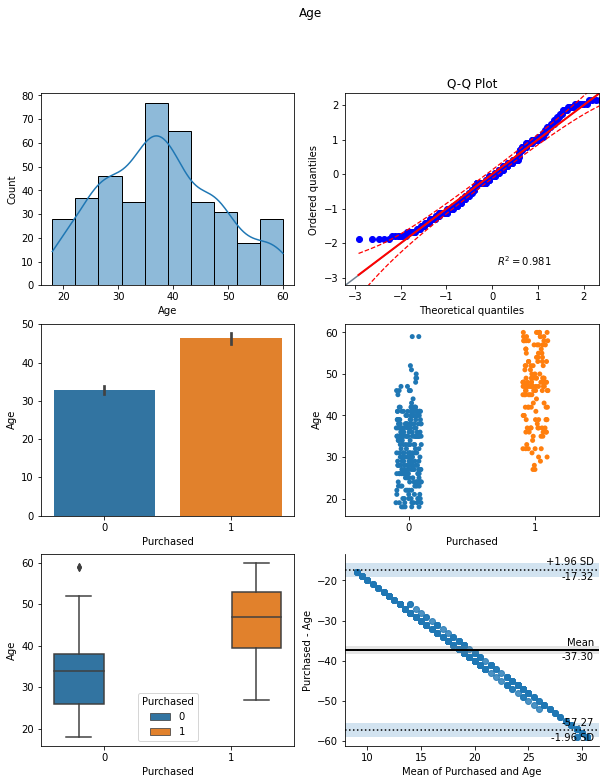

In [69]:
plot_num('Age')

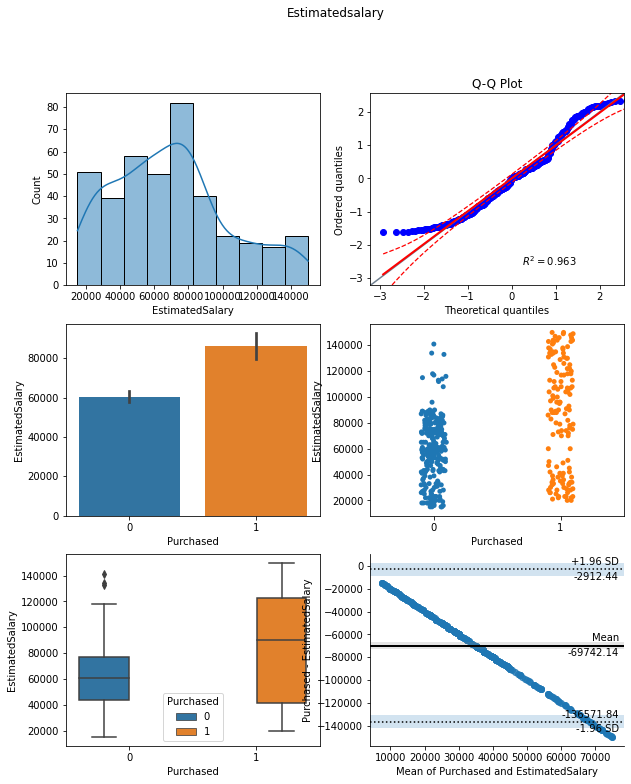

In [70]:
plot_num('EstimatedSalary')

Text(0.5, 1.0, 'Age distribution')

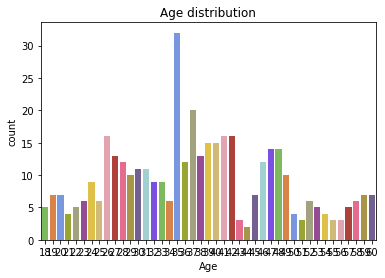

In [74]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
sns.countplot(x='Age', data=df, palette=color_types).set_title('Age distribution')

In [77]:
def plot_cat(a):
  fig,axes=plt.subplots(2,2,figsize=(10,12))
  df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,startangle = 180,autopct='%.0f%%',ax=axes[0][0])
  df[a].value_counts().plot.bar(ax=axes[0][1])
  sns.scatterplot(x=df.Age ,y=df.EstimatedSalary,hue=df[a],ax=axes[1][0],palette='Blues_r')
  sns.stripplot(x=df[a],y=df.EstimatedSalary,hue=df.Purchased,ax=axes[1][1],palette='Blues_r')
  fig.suptitle("Count of"+a.title())
  plt.show()

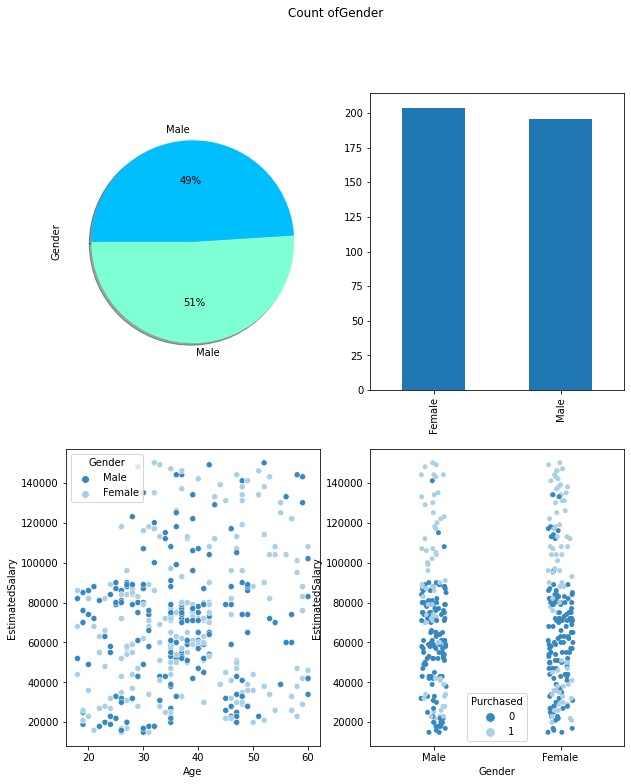

In [78]:
plot_cat('Gender')

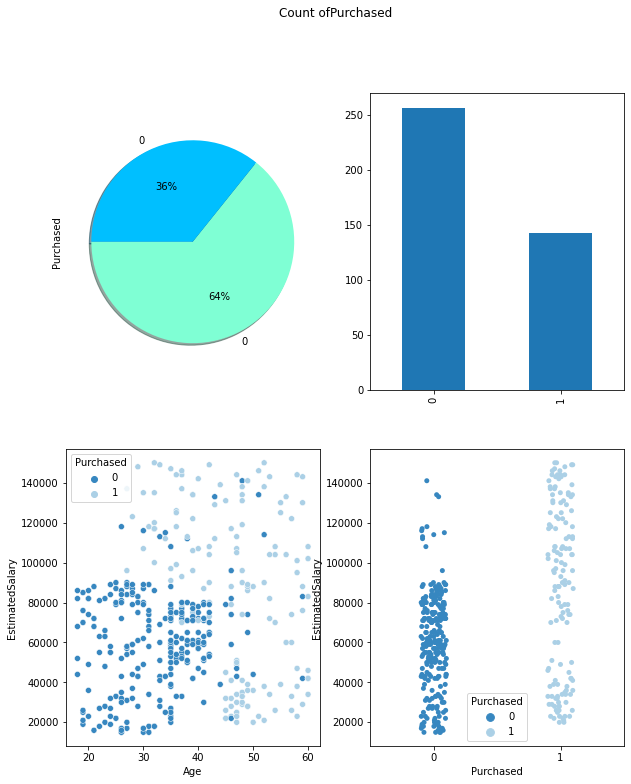

In [79]:
plot_cat('Purchased')

In [81]:
def plot_kde(a):
  facet=sns.FacetGrid(df,hue='Purchased',aspect=4,palette='PuBu')
  facet.map(sns.kdeplot,a,shade=True)
  facet.set(xlim=(0,df[a].max()))
  plt.title(a.title())
  plt.show()

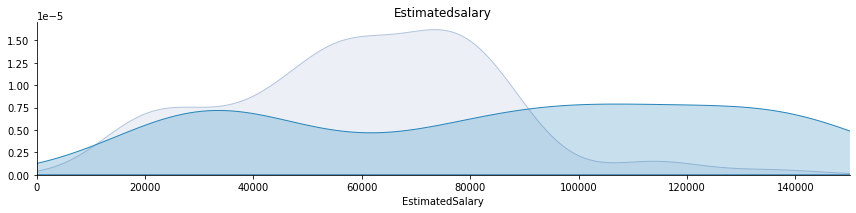

In [82]:
plot_kde('EstimatedSalary')

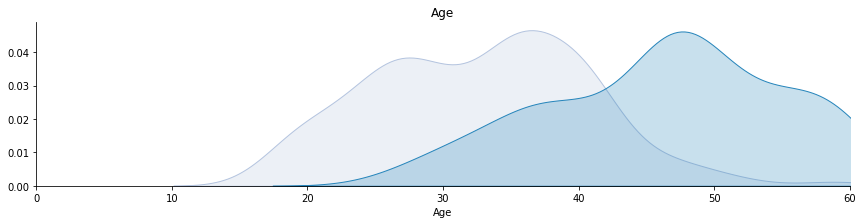

In [83]:
plot_kde('Age')

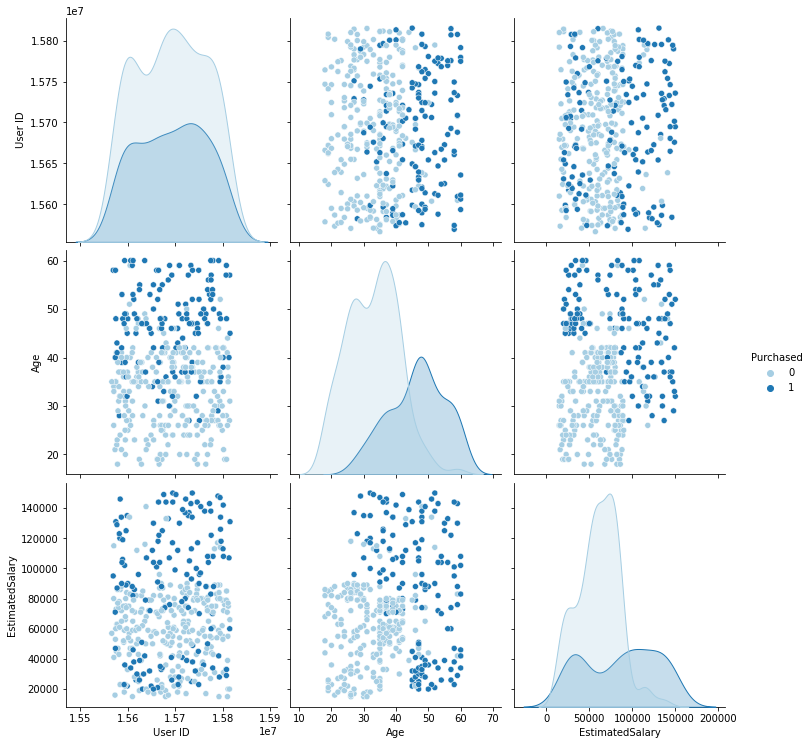

In [84]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Purchased',height=3.5)
plt.show()

In [85]:
import yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [86]:
df.Gender =label_Enc.fit_transform(df.Gender)

In [87]:
label_Enc.classes_


array(['Female', 'Male'], dtype=object)

In [88]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


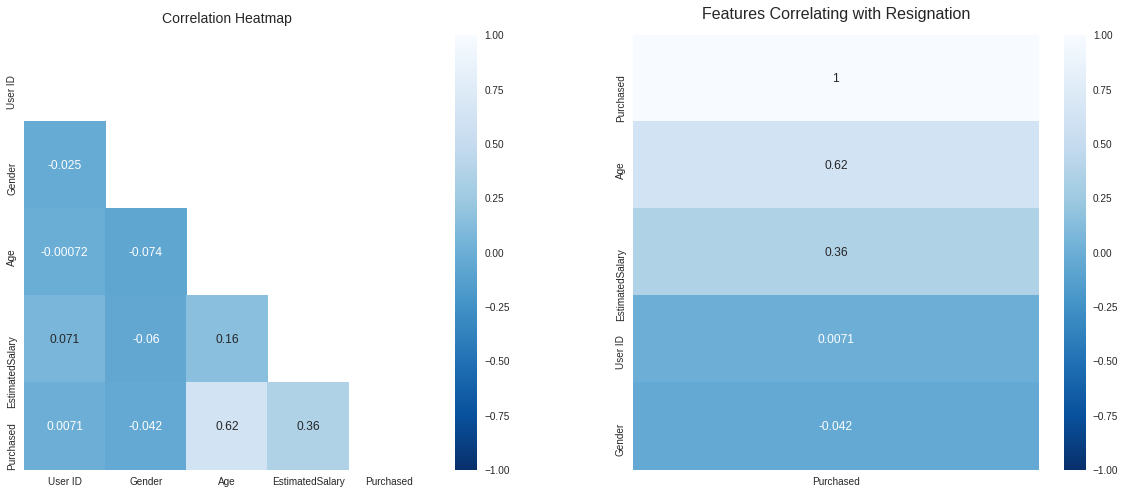

In [91]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Blues_r')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Purchased']].sort_values(by='Purchased',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Blues_r')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

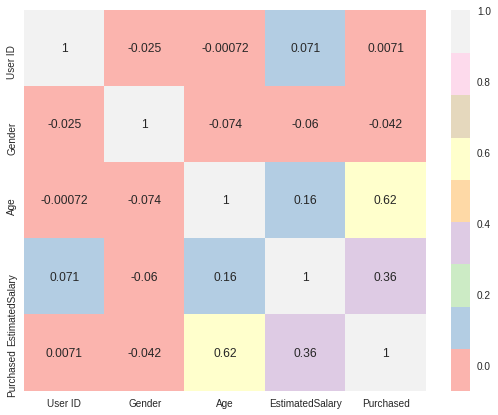

In [92]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

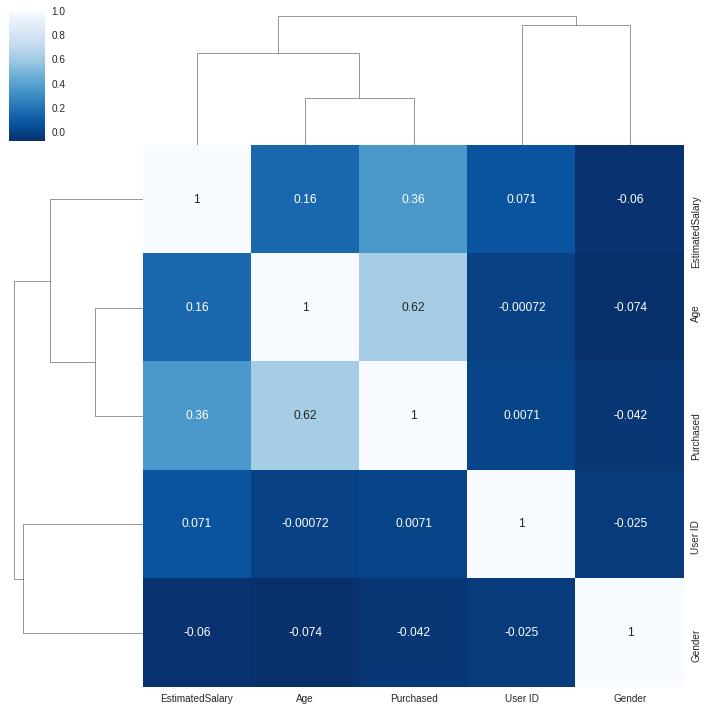

In [93]:
sns.clustermap(df.corr(),annot=True,cmap='Blues_r')

In [95]:
X=df.drop(['Purchased'],axis=1)
y=df['Purchased']

In [96]:
X[:3]

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000


In [97]:
y[:3]

0    0
1    0
2    0
Name: Purchased, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

In [100]:
X_train[:8]

,User ID,Gender,Age,EstimatedSalary
65,15718071,1,24,58000
179,15673367,0,31,34000
109,15697997,0,38,80000
379,15749381,0,58,23000
325,15695679,0,41,60000
348,15579212,1,39,77000
371,15774744,1,60,83000
305,15787550,1,42,54000


In [101]:
X_test[:8]

,User ID,Gender,Age,EstimatedSalary
331,15589715,0,48,119000
92,15809823,1,26,15000
1,15810944,1,35,20000
234,15619407,0,38,112000
136,15668504,0,20,82000
356,15778368,1,54,70000
122,15724423,0,40,75000
223,15593715,1,60,102000


In [102]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=2)


In [104]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [105]:
y_pred=knn_clf.predict(X_test)

In [106]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7375


In [107]:
print("Recall Score",recall_score(y_test,y_pred))


Recall Score 0.3103448275862069


In [108]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.9


In [109]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.4615384615384615


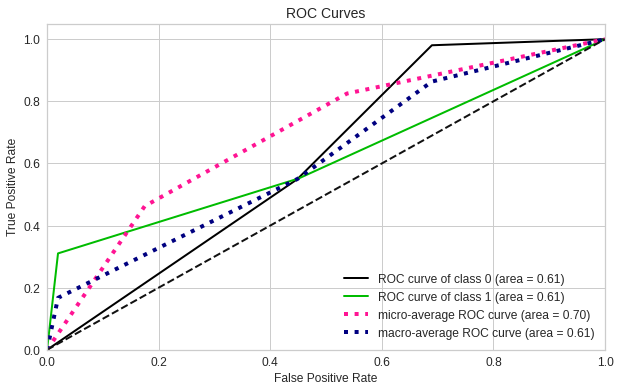

In [110]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

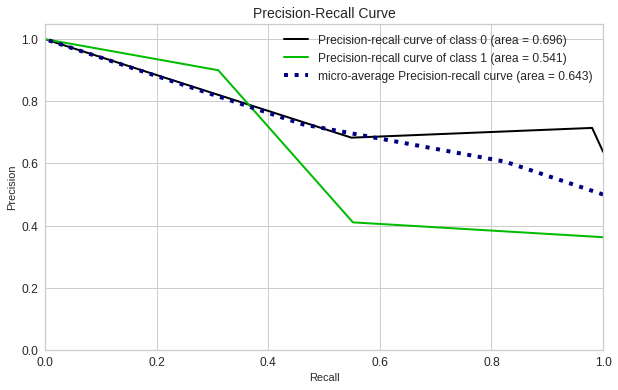

In [111]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

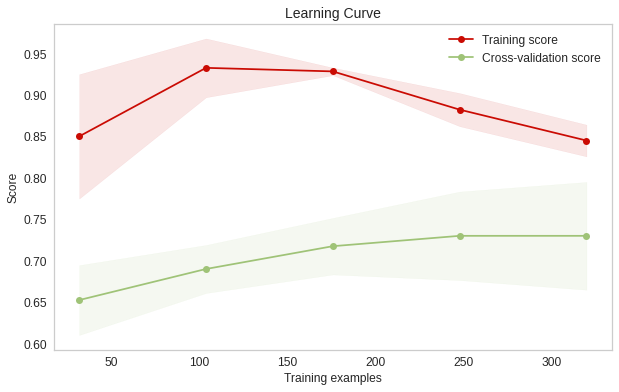

In [112]:
skplt.estimators.plot_learning_curve(knn_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

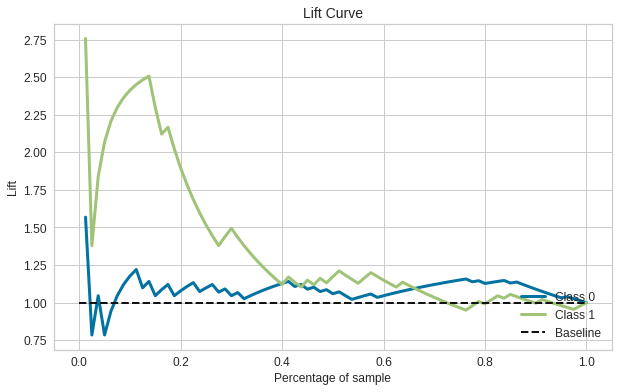

In [113]:
skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

In [114]:
confusion_matrix(y_test, y_pred)

array([[50,  1],
       [20,  9]])

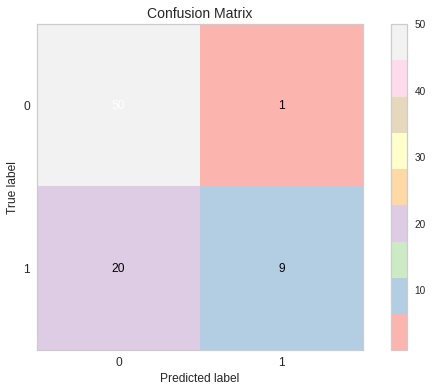

In [115]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.83        51
           1       0.90      0.31      0.46        29

    accuracy                           0.74        80
   macro avg       0.81      0.65      0.64        80
weighted avg       0.78      0.74      0.69        80

